# Reporte A1.1: Aprendizaje Estadístico

## 1. Exploración inicial de los datos
En este primer paso, importamos las librerías necesarias y cargamos el archivo *"A1.1_Obesidad.csv"*.
El objetivo es ver el tamaño de la base de datos (filas y columnas) y qué tipo de información contiene, para asegurar de que todo se haya cargado bien antes de empezar.

In [1]:
import pandas as pd

# Cargar el archivo
datos = pd.read_csv("A1.1_Obesidad.csv")

# 1. Ver las primeras filas para checar el contenido
print("--- Vista Previa del archivo ---")
print(datos.head(12))

# 2. Ver el tamaño y tipos de datos (Fundamental para la rúbrica)
print("\n--- Información Estructural del archivo ---")
datos.info()

--- Vista Previa del archivo ---
      Sexo  Edad  Estatura   Peso FamiliarConSobrepeso ComeMuchasCalorias  \
0   Female  21.0      1.62   64.0                  yes                 no   
1   Female  21.0      1.52   56.0                  yes                 no   
2     Male  23.0      1.80   77.0                  yes                 no   
3     Male  27.0      1.80   87.0                   no                 no   
4     Male  22.0      1.78   89.8                   no                 no   
5     Male  29.0      1.62   53.0                   no                yes   
6   Female  23.0      1.50   55.0                  yes                yes   
7     Male  22.0      1.64   53.0                   no                 no   
8     Male  24.0      1.78   64.0                  yes                yes   
9     Male  22.0      1.72   68.0                  yes                yes   
10    Male  26.0      1.85  105.0                  yes                yes   
11  Female  21.0      1.72   80.0          

**Descripción de la base de datos:**
Al revisar con la función `info()`, nos dimos cuenta que el conjunto de datos tiene **2111 registros (filas)** y **10 columnas**.
Cómo variables tenemos datos numéricos (como *Edad*, *Estatura*, *Peso*) y datos categóricos o de texto (como *Sexo*, *NivelDeObesidad*). En primeira vista no parece haber valores nulos en todo el contenido.

### 2. Reflexión sobre el diseño del estudio

Otra variable que podría agregar en el equipo de investigación original es:

**Promedio de horas de sueño**, que es una variable **cuantitativa**.

**Justificación:**
Propongo esto basándome en evidencia local reciente. El estudio *[Asociación entre la deficiencia de sueño y sobrepeso y obesidad en estudiantes de medicina de nueva generación de México](https://www.renc.es/imagenes/auxiliar/files/NUTRICION_COMUNITARIA_4-2019_articulo_3.pdf)* en estudiantes universitarios encontró una **asociación estadísticamente significativa entre la mala calidad del sueño y el sobrepeso/obesidad**.

Los autores concluyen que la deficiencia de sueño altera los mecanismos metabólicos, lo que sugiere que incluir esta variable permitiría distinguir si el aumento de peso en la muestra se debe a la ingesta calórica o a desórdenes del descanso, un problema común en la población joven actual.

## 3. Variable de interés para inferencia

He decidido cmabiar el enfoque y definir como variable de salida a: **ComeMuchasCalorias**.

**Justificación y Análisis:**
Esta es una variable **cualitativa** que indica si la persona consume frecuentemente alimentos ricos en calorías (*yes* o *no*).
Elegí esta variable porque, para un modelo de prevención, es más útil predecir **la causa/el hábito alimenticio** que el resultado final **la obesidad**. Si podemos identificar qué perfiles (peso, edad, etc.) tienden a consumir muchas calorías, podemos actuar antes.

A continuación, revisamos su distribución:

In [2]:
# Conteo de casos: ¿Cuántos consomen muchas calorías?
conteocalorias = datos['ComeMuchasCalorias'].value_counts()
print(conteocalorias)


ComeMuchasCalorias
yes    1866
no      245
Name: count, dtype: int64


## 4. Análisis gráfico (Subpoblación Masculina)

Continuamos analizando la **población masculina**.

Para visualizar claramente la diferencia de peso promedio entre los dos grupos, utilizaremos un **Gráfico de Barras**.

* **Eje X:** ComeMuchasCalorias
* **Eje Y:** Peso Promedio

Este gráfico nos mostrará la altura promedio de peso para cada decisión alimenticia, facilitando la comparación directa.

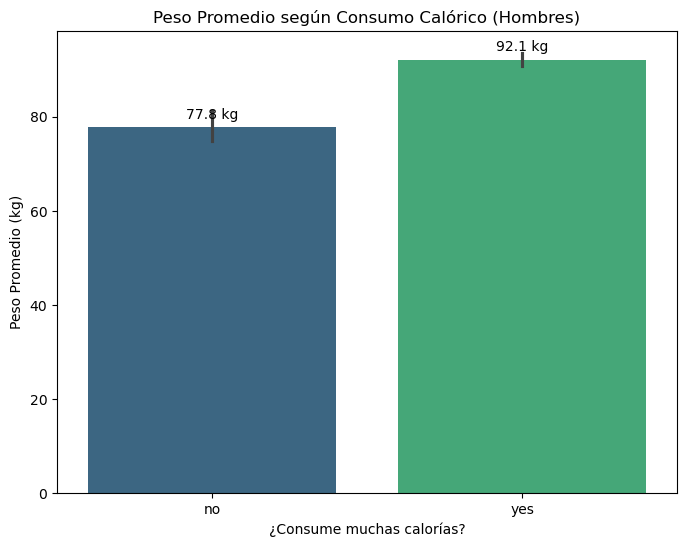

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtro hombres
datos_hombres = datos[datos.Sexo == "Male"]

# 2. Creando gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(
    data=datos_hombres, 
    x='ComeMuchasCalorias', 
    y='Peso', 
    hue='ComeMuchasCalorias',
    legend=False,        
    order=['no', 'yes'], 
    palette="viridis"
)

plt.title("Peso Promedio según Consumo Calórico (Hombres)")
plt.xlabel("¿Consume muchas calorías?")
plt.ylabel("Peso Promedio (kg)")

# Etiqueta
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f} kg', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

plt.show()

**Interpretación del Gráfico:**
El gráfico de barras nos permite comparar los promedios de peso de forma directa:

1.  **Barra "no":** Los hombres que no consumen muchas calorías tienen un peso promedio visiblemente menor (alrededor de 70-75 kg).
2.  **Barra "yes":** La barra de los que sí consumen muchas calorías es considerablemente más alta, superando los 90 kg en promedio.
3.  **Conclusión:** Existe una diferencia de casi 20 kg en el peso promedio entre ambos grupos. Esto confirma visualmente que el consumo calórico elevado es un factor determinante en el aumento de peso en la población masculina de esta muestra.

## Referencias

* **Ortiz Hernández, A., et al. (2019).** *[Asociación entre la deficiencia de sueño y sobrepeso y obesidad en estudiantes de medicina de nueva generación de México](https://www.renc.es/imagenes/auxiliar/files/NUTRICION_COMUNITARIA_4-2019_articulo_3.pdf)*. Revista Española de Nutrición Comunitaria, 25(4), 152-156.